#Importando DataSet

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')

In [3]:
#Formato df:
df.shape

(42000, 785)

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
#Separando conjunto de teste e de treinamento:
X_train, X_test, y_train, y_test = train_test_split(df.drop('label', axis=1), df['label'], test_size=0.3, random_state=42)

In [7]:
#Formato X_train:
X_train.shape

(29400, 784)

In [8]:
#Formato y_train:
y_train.shape

(29400,)

In [9]:
import matplotlib.pyplot as plt

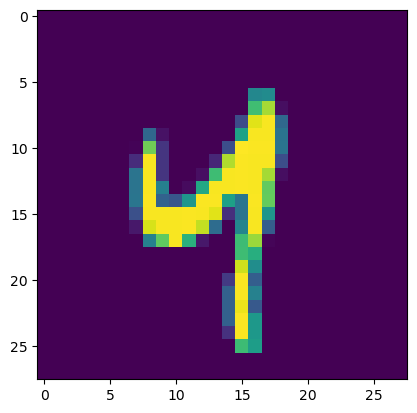

In [10]:
#Visualizando uma instância:
plt.imshow(X_train.iloc[0].values.reshape(28, 28))

In [11]:
#Reformulando formato:
X_train = X_train.values.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.values.reshape(X_test.shape[0], 28, 28, 1)

In [12]:
!pip install visualkeras

In [13]:
!pip install tensorflow

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
#Reformulando formato da etiquetas:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [16]:
#Normalizando:
X_train = X_train / 255
X_test = X_test / 255

In [17]:
from tensorflow import keras

In [18]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [19]:
from keras.models import Sequential

1º experimento:

In [20]:
model = Sequential()

#Primeira camada convulacional:
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

#Primeira camada de pooling:
model.add(MaxPooling2D(pool_size=(2, 2)))

#Camada Flatten - converte o conjunto de imagens em um vetor unidimensional para a entrada da rede neural densa:
model.add(Flatten())

#Rede neural densa:
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
history = model.fit(X_train, y_train, epochs=40, batch_size=1000, validation_data=(X_test, y_test))

Epoch 1/40


30/30 [==============================] - 5s 95ms/step - loss: 1.3690 - accuracy: 0.6141 - val_loss: 0.5542 - val_accuracy: 0.8594
Epoch 2/40
30/30 [==============================] - 3s 88ms/step - loss: 0.5709 - accuracy: 0.8283 - val_loss: 0.3441 - val_accuracy: 0.9040
Epoch 3/40
30/30 [==============================] - 4s 136ms/step - loss: 0.4208 - accuracy: 0.8745 - val_loss: 0.2759 - val_accuracy: 0.9185
Epoch 4/40
30/30 [==============================] - 3s 92ms/step - loss: 0.3518 - accuracy: 0.8966 - val_loss: 0.2319 - val_accuracy: 0.9321
Epoch 5/40
30/30 [==============================] - 5s 156ms/step - loss: 0.3020 - accuracy: 0.9096 - val_loss: 0.2014 - val_accuracy: 0.9428
Epoch 6/40
30/30 [==============================] - 3s 112ms/step - loss: 0.2642 - accuracy: 0.9229 - val_loss: 0.1756 - val_accuracy: 0.9509
Epoch 7/40
30/30 [==============================] - 4s 118ms/step - loss: 0.2316 - accuracy: 0.9317 - val_loss: 0.1564 - val_accuracy: 0.9568
Epoch 8

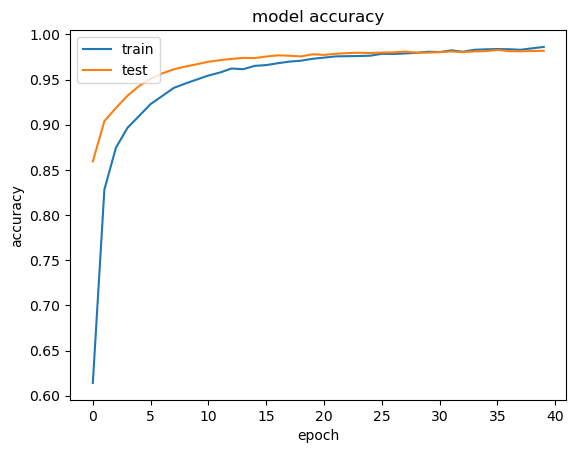

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

2º experimento

In [24]:
model2 = Sequential()

#Primeira camada convolucional:
model2.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model2.add(Dropout(0.2))

#Primeira camada pooling:
model2.add(MaxPooling2D(pool_size=(2,2)))

#Segunda camada convolucional:
model2.add(Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)))
model2.add(Dropout(0.2))

#Segunda camada pooling:
model2.add(MaxPooling2D(pool_size=(2,2)))

#Camada flatten:
model2.add(Flatten())

#Camada rede neural densa:
model2.add(Dense(32, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10, activation='softmax'))

In [25]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
history2 = model2.fit(X_train, y_train, epochs=60, batch_size=1000, validation_data=(X_test, y_test))

Epoch 1/60
30/30 [==============================] - 21s 638ms/step - loss: 1.6226 - accuracy: 0.4291 - val_loss: 0.8266 - val_accuracy: 0.8148
Epoch 2/60
30/30 [==============================] - 19s 642ms/step - loss: 0.6162 - accuracy: 0.8016 - val_loss: 0.3867 - val_accuracy: 0.9177
Epoch 3/60
30/30 [==============================] - 15s 515ms/step - loss: 0.3709 - accuracy: 0.8871 - val_loss: 0.2587 - val_accuracy: 0.9444
Epoch 4/60
30/30 [==============================] - 14s 463ms/step - loss: 0.2739 - accuracy: 0.9194 - val_loss: 0.1983 - val_accuracy: 0.9550
Epoch 5/60
30/30 [==============================] - 21s 672ms/step - loss: 0.2244 - accuracy: 0.9335 - val_loss: 0.1666 - val_accuracy: 0.9618
Epoch 6/60
30/30 [==============================] - 16s 556ms/step - loss: 0.1886 - accuracy: 0.9437 - val_loss: 0.1386 - val_accuracy: 0.9677
Epoch 7/60
30/30 [==============================] - 15s 514ms/step - loss: 0.1690 - accuracy: 0.9495 - val_loss: 0.1241 - val_accuracy: 0.9723

3º experimento:

In [27]:
model3 = Sequential()

#Primeira camada convolucional:
model3.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)))
model3.add(Dropout(0.2))

#Segunda camada convolucional:
model3.add(Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(28,28,1)))
model3.add(Dropout(0.2))

#Primeira camada pooling:
model3.add(MaxPooling2D(pool_size=(2,2)))

#Segunda camada convolucional:
model3.add(Conv2D(128, (3,3), activation='relu', padding='same', input_shape=(28,28,1)))
model3.add(Dropout(0.3))

#Segunda camada pooling:
model3.add(MaxPooling2D(pool_size=(2,2)))

#Camada flatten:
model3.add(Flatten())

#Camada rede neural densa:
model3.add(Dense(32, activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(32, activation='relu'))
model3.add(Dropout(0.4))
model3.add(Dense(10, activation='softmax'))

In [28]:
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
checkpoint = keras.callbacks.ModelCheckpoint('my_keras_model.h5', monitor='val_accuracy', mode='auto', verbose=1, save_best_only=True)
history3 = model3.fit(X_train, y_train, epochs=100, batch_size=1000, validation_data=(X_test, y_test), callbacks=[checkpoint])

Epoch 1/100
30/30 [==============================] - 78s 3s/step - loss: 1.4938 - accuracy: 0.4704 - val_loss: 0.7157 - val_accuracy: 0.8712
Epoch 2/100
30/30 [==============================] - 80s 3s/step - loss: 0.6883 - accuracy: 0.7677 - val_loss: 0.2881 - val_accuracy: 0.9440
Epoch 3/100
30/30 [==============================] - 78s 3s/step - loss: 0.4058 - accuracy: 0.8706 - val_loss: 0.1704 - val_accuracy: 0.9622
Epoch 4/100
30/30 [==============================] - 80s 3s/step - loss: 0.2855 - accuracy: 0.9139 - val_loss: 0.1305 - val_accuracy: 0.9721
Epoch 5/100
30/30 [==============================] - 82s 3s/step - loss: 0.2249 - accuracy: 0.9316 - val_loss: 0.1025 - val_accuracy: 0.9753
Epoch 6/100
30/30 [==============================] - 86s 3s/step - loss: 0.1888 - accuracy: 0.9435 - val_loss: 0.0878 - val_accuracy: 0.9771
Epoch 7/100
30/30 [==============================] - 77s 3s/step - loss: 0.1652 - accuracy: 0.9500 - val_loss: 0.0714 - val_accuracy: 0.9810
Epoch 8/100
3

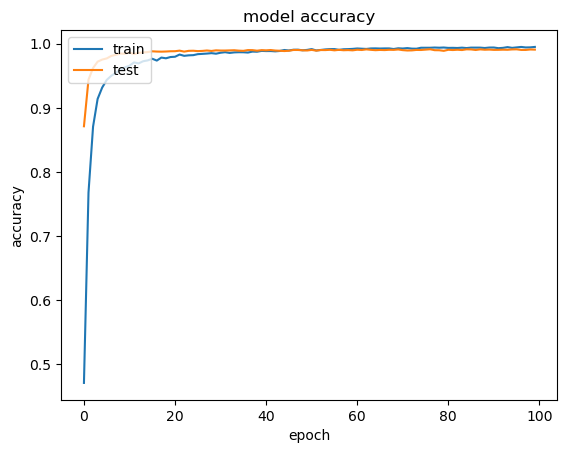

In [30]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [32]:
y_pred = model3.predict(X_test)

394/394 [==============================] - 7s 18ms/step


In [33]:
y_pred

array([[2.0918777e-11, 4.0546321e-16, 2.4592488e-09, ..., 4.2302144e-16,
        1.0000000e+00, 3.4970405e-11],
       [1.3080514e-13, 1.0000000e+00, 5.2349455e-13, ..., 3.4260446e-09,
        8.3003579e-15, 2.5422455e-16],
       [1.0284439e-12, 7.6731656e-11, 1.4792367e-13, ..., 1.7620533e-07,
        1.9818023e-09, 9.9999976e-01],
       ...,
       [2.9591452e-14, 2.8815125e-15, 3.4447746e-15, ..., 5.8665643e-13,
        2.4669892e-14, 1.2307713e-09],
       [2.4347143e-12, 2.4767547e-13, 8.3460718e-13, ..., 4.5690462e-11,
        2.2700871e-12, 1.7576303e-08],
       [9.9999988e-01, 3.7931984e-12, 2.9481584e-11, ..., 2.7801895e-13,
        1.9072299e-09, 5.7163042e-11]], dtype=float32)

In [34]:
y_test

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

<Axes: >

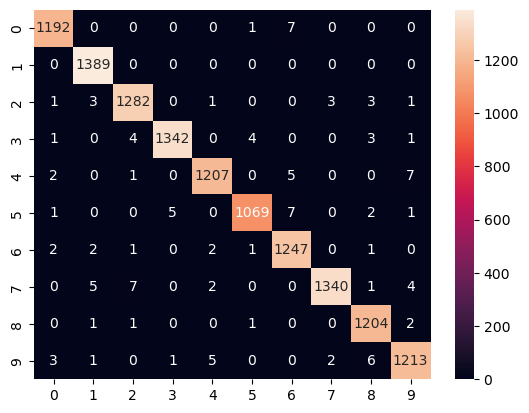

In [35]:
confusion = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
sns.heatmap(confusion, annot=True, fmt='g')

In [36]:
score = model3.evaluate(X_test, y_test)

394/394 [==============================] - 7s 18ms/step - loss: 0.0396 - accuracy: 0.9909


Preparando arquivo submission

In [37]:
df_test = pd.read_csv('test.csv')
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df_test.shape

(28000, 784)

In [39]:
df_test = df_test.values.reshape(df_test.shape[0], 28, 28, 1)

In [40]:
y_pred_test = model3.predict(df_test)

875/875 [==============================] - 15s 18ms/step


In [41]:
y_pred_test = y_pred_test.argmax(axis=1)

In [42]:
id_test = range(1, 28001)

In [43]:
df_sub_ids = pd.DataFrame(id_test, columns=['ImageId'], index=id_test)
df_sub_preds = pd.DataFrame(y_pred_test, columns=['Label'], index=id_test)

In [44]:
df_submission = pd.concat([df_sub_ids, df_sub_preds], axis=1)
df_submission.head()

,ImageId,Label
1,1,2
2,2,0
3,3,9
4,4,9
5,5,3


In [45]:
df_submission.to_csv('sample_submission.csv', index=False)